# Final Assignment: Bike Sharing Demand Dataset
## Task 1: Describe the Dataset
1. Read the CSV file with pandas.read_csv and parse the datetime
column.
    - we're printing values.head() to see the first five rows of our csv file
    - values.info() could be used for general type and column declaration 


In [227]:
import pandas as pd
import numpy as np

values = pd.read_csv("day.csv")
print ("head: \n", values.head())
#datetime = np.array([values["dteday"], values["hr"]])
#datetimeFrame = pd.DataFrame([values["dteday"], values["hr"]])
df = pd.DataFrame({
    "target": values["cnt"],
    "datetime": values["dteday"],
    "weather_feature": values["weathersit"],
    "temperature_feature": values["temp"],
    "humidity_feature": values["hum"],
    "windspeed_feature": values["windspeed"],
    "season_feature": values["season"],
    "holiday_feature": values["holiday"],
    "working_day_feature": values["workingday"],
    "weekday_feature": values["weekday"]
})

head: 
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


2. Report:
    - *Number of rows and columns.*
        - rows: 17379
        - columns: 17
    - *Time range covered by the data.*
        - By printing the parsed date and time columns, we're getting the range of any possible data.
        - dataset from 01.01.2011 to 31.12.2012



In [148]:

print("(rows, columns):", values.shape) # => 731 rows, 16 columns
print("\nDatetime: \n", df["datetime"])


(rows, columns): (731, 16)

Datetime: 
 0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
726    2012-12-27
727    2012-12-28
728    2012-12-29
729    2012-12-30
730    2012-12-31
Name: datetime, Length: 731, dtype: object


- Target variable and list of feature variables (names and data types)
    - Target variable: 
        - Name: cnt / count of all currently rented bikes 
        - Type: Numeric
    -  feature variables: below

In [153]:
# values.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   target               731 non-null    int64  
 1   datetime             731 non-null    object 
 2   weather_feature      731 non-null    int64  
 3   temperature_feature  731 non-null    float64
 4   humidity_feature     731 non-null    float64
 5   windspeed_feature    731 non-null    float64
 6   season_feature       731 non-null    int64  
 7   holiday_feature      731 non-null    int64  
 8   working_day_feature  731 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 51.5+ KB


- Create a variable description table

In [168]:
print("Description: \n", df.describe())

Description: 
             target  weather_feature  temperature_feature  humidity_feature  \
count   731.000000       731.000000           731.000000        731.000000   
mean   4504.348837         1.395349             0.495385          0.627894   
std    1937.211452         0.544894             0.183051          0.142429   
min      22.000000         1.000000             0.059130          0.000000   
25%    3152.000000         1.000000             0.337083          0.520000   
50%    4548.000000         1.000000             0.498333          0.626667   
75%    5956.000000         2.000000             0.655417          0.730209   
max    8714.000000         3.000000             0.861667          0.972500   

       windspeed_feature  season_feature  holiday_feature  working_day_feature  
count         731.000000      731.000000       731.000000           731.000000  
mean            0.190486        2.496580         0.028728             0.683995  
std             0.077498        1.11080

4. Check for:
    - *Missing values per column.*
    - *Duplicated rows (if any).*
    - there are no missing or dublicated rows

In [167]:
# Summary of missing values
print("Number of missing values:", values.isnull().sum().sum())

# Summary of dublicated rows
dRowsSum = values.duplicated(keep=False).sum().sum()
print ("dublicated rows:", dRowsSum)

Number of missing values: 0
dublicated rows: 0


## Description I
- *For numeric variables: calculate mean, standard deviation, minimum, maximum, and quartiles*
    - see the results above
- *For categorical variables: show frequency tables or bar charts (e.g. distribution of seasons or weather types).*

season_feature
1    181
2    184
3    188
4    178
dtype: int64


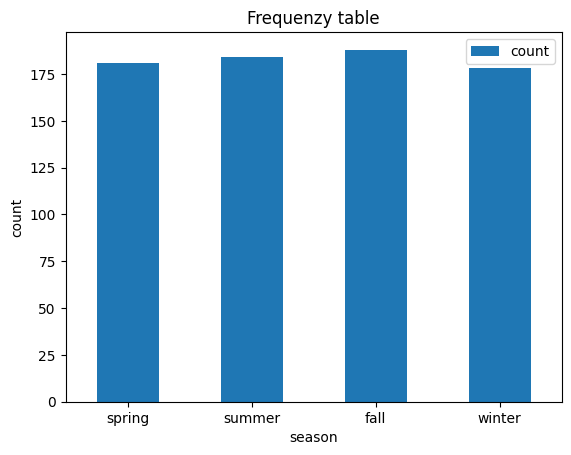

weather_feature
1    463
2    247
3     21
dtype: int64


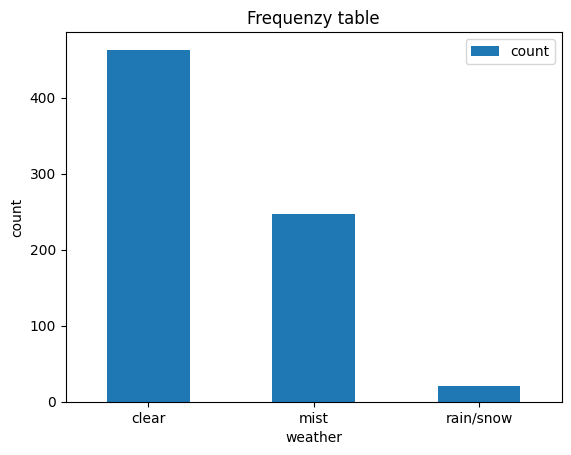

weekday_feature
0    105
1    105
2    104
3    104
4    104
5    104
6    105
dtype: int64


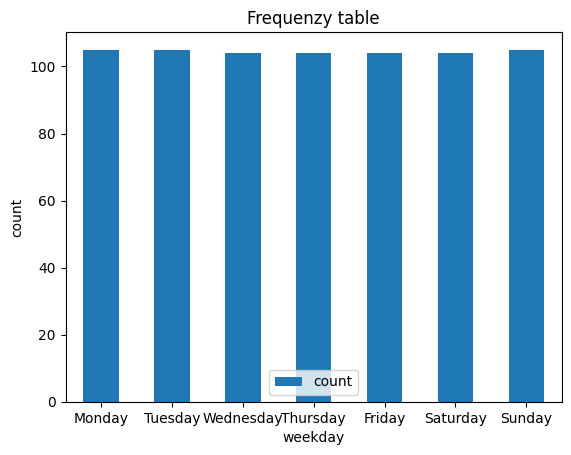

In [219]:
import matplotlib.pyplot as plt
cols = ["season_feature", "weather_feature", "weekday_feature"]    

szy = df.groupby(cols[0]).size()
print(szy)
szx = ["spring", "summer", "fall", "winter"]
df_season = pd.DataFrame({"season": szx,
             "count": szy})
ax = df_season.plot.bar(x='season', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("season")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[1]).size()
print(szy)
szx = ["clear", "mist", "rain/snow"]
df_season = pd.DataFrame({"weather": szx,
             "count": szy})
ax = df_season.plot.bar(x='weather', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weather")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[2]).size()
print(szy)
szx = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_season = pd.DataFrame({"weekday": szx,
             "count": szy})
ax = df_season.plot.bar(x='weekday', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weekday")
plt.ylabel("count")
plt.show()

## Visulisation
To plot the total bike demand over the full period, i've set the date as x value and the rent count as y value.

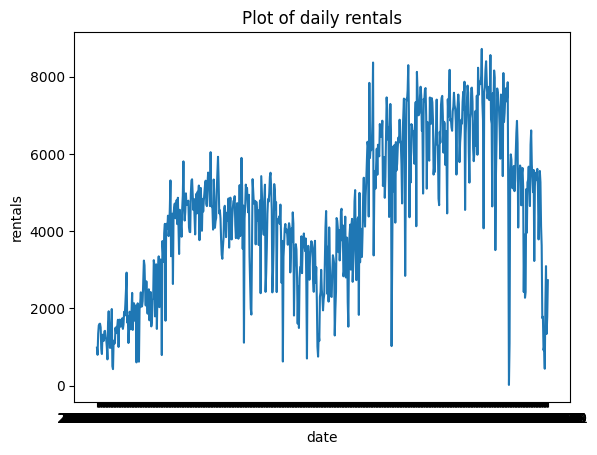

In [228]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["target"]

plt.plot(x, y)
plt.title("Plot of daily rentals")
plt.xlabel("date")
plt.ylabel("rentals")
plt.show()

distibution of numeric variables - histograms of temp, humidity, windspeed

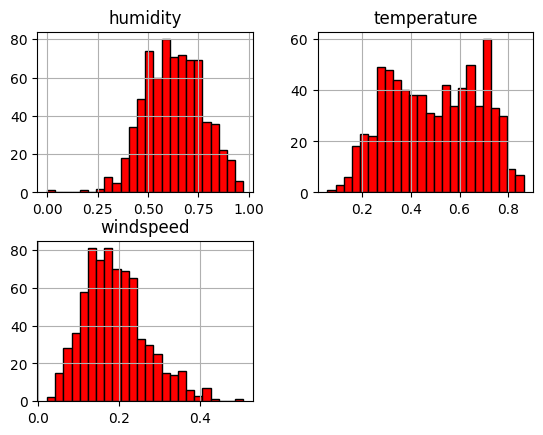

In [250]:
df_numeric = pd.DataFrame({
    "humidity": df["humidity_feature"],
    "temperature": df["temperature_feature"],
    "windspeed": df["windspeed_feature"]
})

df_numeric.hist(bins =2*12 , color = "red" ,
edgecolor = "black")
plt.show()


- *Plot aggregated demand by season, day of week or hour of day (e.g. bar charts or line plots)*

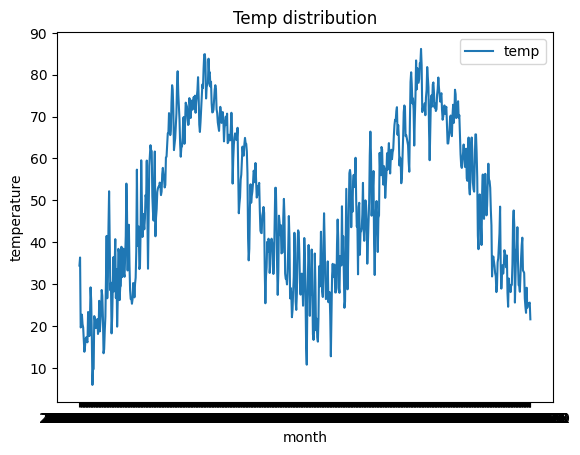

In [256]:
plt.plot(values.dteday, values.temp * 100, label="temp")
plt.title("Temp distribution")
plt.xlabel("month" )
plt.ylabel( "temperature" )
plt.legend()
plt.show()


- *Write a short text summary (3–5 sentences) describing main patterns you observe (seasonality, daily patterns, influence of weather, etc.).*

During season 2 and 3, the rent business is getting the most requests. On the last chart you can see equalities between the amount of rents and the temperature (same highs and lows). Even wind could be a small factor. With less wind, more people want to rent bikes.